<a href="https://colab.research.google.com/github/karol10542/deep_course/blob/main/number_plate_localization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import cv2
import os
import matplotlib.pyplot as plt
%matplotlib inline


In [ ]:
!pip install pytesseract


  Created wheel for pytesseract: filename=pytesseract-0.3.7-py2.py3-none-any.whl size=13945 sha256=297b1b10c3e1aaec3f7ed024f5c48ef22a59e4a4bc1d94fddc45621aba2475ed
  Stored in directory: /root/.cache/pip/wheels/81/20/7e/1dd0daad1575d5260916bb1e9781246430647adaef4b3ca3b3
Successfully built pytesseract


In [ ]:
# pozowli czytać tekst z obrazu
import pytesseract


In [ ]:
print(cv2.__version__)

4.1.2


In [ ]:
#tworze funkcje ktora ustawi obrazy kolo siebie w celu zweryfikowania wprowadzonych zmian
def plot_images(img1,img2,title1="",title2=""):
  fig=plt.figure(figsize=(15,15))
  ax1=fig.add_subplot(121)
  ax1.imshow(img1,cmap="gray")
  ax1.set(xticks=[],yticks=[],title=title1)

  
  ax2=fig.add_subplot(122)
  ax2.imshow(img2,cmap="gray")
  ax2.set(xticks=[],yticks=[],title=title2)

In [ ]:
path = "/a6.png"

image=cv2.imread(path)

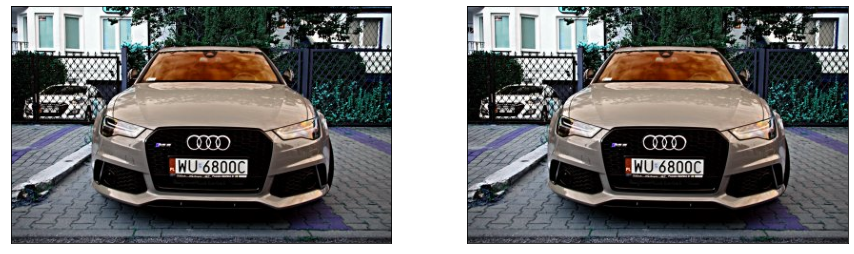

In [ ]:
plot_images(image,image)

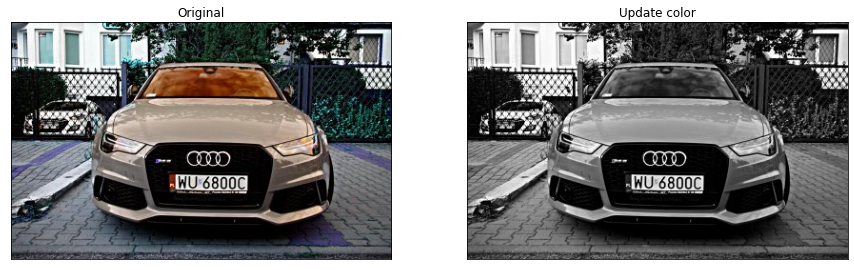

In [ ]:
#konwertujemy kolory obrazu na odcienie szarosci, co zmniejszy obciazenie procesora i zmniejszy czas wykonywania

gray=cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)

plot_images(image,gray,title1="Original",title2="Update color")

In [ ]:
#nakładamy filtr ktory rozmyje background
blur=cv2.bilateralFilter(gray,10,90,90)

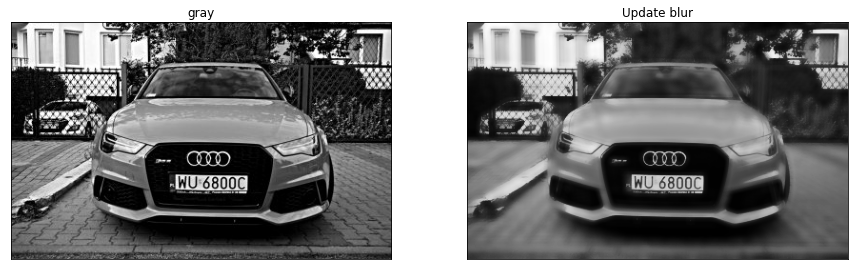

In [ ]:
plot_images(gray,blur,title1="gray",title2="Update blur")

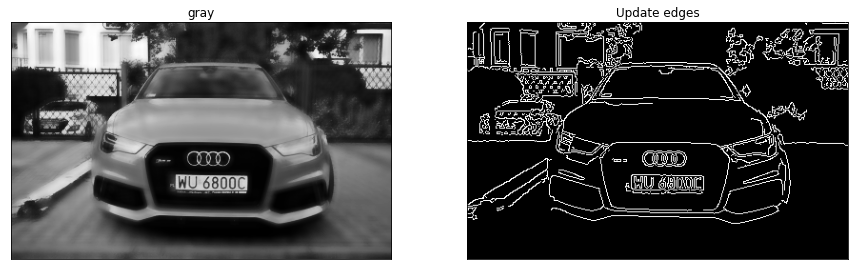

In [ ]:
edges=cv2.Canny(blur,30,200)
plot_images(blur,edges,title1="gray",title2="Update edges")

In [ ]:
cnts,new = cv2.findContours(edges.copy(),cv2.RETR_LIST,cv2.CHAIN_APPROX_SIMPLE)

In [ ]:
image_copy = image.copy()

In [ ]:
_=cv2.drawContours(image_copy,cnts,-1,(255,0,255),2)

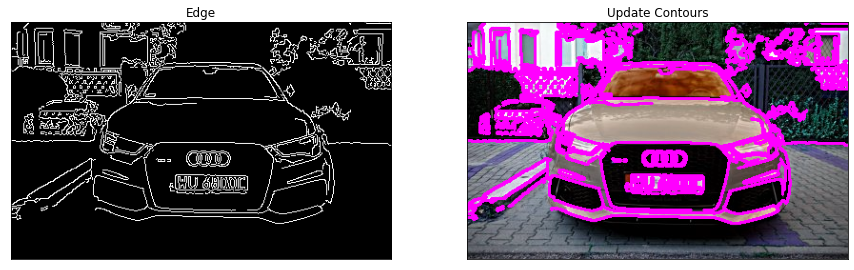

In [ ]:
plot_images(edges,image_copy,title1="Edge",title2="Update Contours")

In [ ]:
print(len(cnts))

323


In [ ]:
cnts=sorted(cnts,key=cv2.contourArea,reverse=True)